# FCS released by WFP (vam food security analysis)

The complete version of the data released by WFP regarding the Food Consumption Score (FCS). For more details, see the notebook of the demo version.

In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
import numpy as np
import ntpath
import glob
plt.style.use("ggplot")

In [2]:
# Read the data released by wfp regarding the FCS indicator.
path = "./wfp_data/"
all_files = glob.glob(path + "*.csv")

dfs = []

for filename in all_files:
    df = pd.read_csv(filename)
    df["Country"] = ntpath.basename(filename).split(".")[0]
    dfs.append(df)

df = pd.concat(dfs, axis = 0, ignore_index = True)
df.head()

SvyDate        Date             Dmgrph  DmgrphCode  Mean_crrnt  \
0  2019-7-15_2019-9-8  2019-09-08  BOUCLE-DU-MOUHOUN    900712.0   30.921705   
1  2019-7-15_2019-9-8  2019-09-08           CASCADES    900713.0   22.732405   
2  2019-7-15_2019-9-8  2019-09-08             CENTRE    900714.0   22.093784   
3  2019-7-15_2019-9-8  2019-09-08         CENTRE-EST    900715.0   44.186047   
4  2019-7-15_2019-9-8  2019-09-08        CENTRE-NORD    900716.0   61.948843   

       Pop  PopNmbr       Country  
0  1976217   611079  Burkina Faso  
1   822445   186961  Burkina Faso  
2  2854356   630635  Burkina Faso  
3  2854356  1261227  Burkina Faso  
4  1687858  1045608  Burkina Faso

### Brief keys description

- *SvyDate*: reference period of the data collection.
- *Date*: reference date (i.e. the end of the reference period). 
- *Dmgrph*: administrative area name.
- *DmgrphCode*: a code for identyfing the adminstrata.
- *Mean_crrnt*: % of people with poor and borderline FCS.
- *Pop*: area population size.
- *PopNmbr*: number of people with poor and borderline FCS (i.e. Mean_crrnt * Pop).

In [3]:
# Check if the dataframe contains NaN values.
df.isnull().sum()

SvyDate          0
Date             0
Dmgrph           0
DmgrphCode    1620
Mean_crrnt       0
Pop              0
PopNmbr          0
Country          0
dtype: int64

In [4]:
# Let's delete the item 'DmgrphCode'.
df.drop(["DmgrphCode"], axis = 1, inplace = True) 

In [5]:
# Rename some columns.
df.rename(columns = {"Date": "Datetime", "Dmgrph": "AdminStrata", "Mean_crrnt": "Metric"}, inplace = True)

In [6]:
df.head()

SvyDate    Datetime        AdminStrata     Metric      Pop  \
0  2019-7-15_2019-9-8  2019-09-08  BOUCLE-DU-MOUHOUN  30.921705  1976217   
1  2019-7-15_2019-9-8  2019-09-08           CASCADES  22.732405   822445   
2  2019-7-15_2019-9-8  2019-09-08             CENTRE  22.093784  2854356   
3  2019-7-15_2019-9-8  2019-09-08         CENTRE-EST  44.186047  2854356   
4  2019-7-15_2019-9-8  2019-09-08        CENTRE-NORD  61.948843  1687858   

   PopNmbr       Country  
0   611079  Burkina Faso  
1   186961  Burkina Faso  
2   630635  Burkina Faso  
3  1261227  Burkina Faso  
4  1045608  Burkina Faso

### Country key

In [7]:
print("The countries are:", ", ".join(df.Country.unique()))

The countries are: Burkina Faso, Nigeria, Syria, Yemen


### AdminStrata key

In [8]:
AdminStratas = df.groupby("Country")["AdminStrata"].unique()

- **Yemen**: the administrative division of Yemen is divided into two main divisions (governorates and districts). There are 22 governorates, including the capital Sana'a (Amanat Al Asimah) and Socotra Archipelago. The FCS dataframe has the values of all the 22 governorates.

In [9]:
print(AdminStratas["Yemen"].shape)
AdminStratas["Yemen"]

(22,)


array(['Abyan', 'Al Hudaydah', 'Al Jawf', 'Al Maharah', 'Al Mahwit',
       'Amanat Al Asimah', 'Amran', 'Dhamar', 'Hadramaut', 'Hajjah',
       'Ibb', 'Lahj', 'Marib', 'Raymah', "Sa'ada", "Sana'a", 'Shabwah',
       'Taizz', 'Aden', 'Al Bayda', "Al Dhale'e", 'Socotra'], dtype=object)

- **Nigeria**: Nigeria is divided into 36 states. The AdminStrata items of the FCS dataframe cover 3 states (Adamawa, Borno and Yobe) and each of these state is diveded into three parts: North, South, Central.

In [10]:
print(AdminStratas["Nigeria"].shape)
AdminStratas["Nigeria"]

(9,)


array(['Adamawa Central', 'Adamawa North', 'Adamawa South',
       'Borno Central', 'Borno North', 'Borno South', 'Yobe East',
       'Yobe North', 'Yobe South'], dtype=object)

- **Syria**: the governatores of the Syria country are 14. The FCS dataframe has the values of 13 governorates (Idlib governatore not included).

In [11]:
print(AdminStratas["Syria"].shape)
AdminStratas["Syria"]

(13,)


array(['Tartous', 'Al-Hasakeh', 'Aleppo', 'As-Sweida', 'Damascus',
       "Dar'a", 'Hama', 'Homs', 'Lattakia', 'Rural Damascus', 'Ar-Raqqa',
       'Deir-ez-Zor', 'Quneitra'], dtype=object)

- **Burkina Faso**: Burkina Faso is divided into 13 administrative regions. The FCS dataframe has the values of all 13 regions.

In [12]:
print(AdminStratas["Burkina Faso"].shape)
AdminStratas["Burkina Faso"]

(13,)


array(['BOUCLE-DU-MOUHOUN', 'CASCADES', 'CENTRE', 'CENTRE-EST',
       'CENTRE-NORD', 'CENTRE-OUEST', 'CENTRE-SUD', 'EST',
       'HAUTS-BASSINS', 'NORD', 'PLATEAU-CENTRAL', 'SAHEL', 'SUD-OUEST'],
      dtype=object)

In [13]:
# The strings of AdminStrata key for Burkina Faso country are uppercase, I change them to obtain lowercase with first capital letter.
def to_lower(country, admin):
    if country == "Burkina Faso":
        admin = admin.lower().title()      
    return admin
    
df["AdminStrata"] = df[["Country", "AdminStrata"]].apply(lambda x: to_lower(*x), axis = 1)

In [14]:
# Check the min e max values of the Metric.
print(df.Metric.min(), df.Metric.max())

2.24791265253693 84.55928979074173


In [15]:
# Creation of an accurate datetime format (not consider the item 'SvyDate').
df.drop(["SvyDate"], axis = 1, inplace = True) 
df["Datetime"] = pd.to_datetime(df["Datetime"])
df.sort_values("Datetime", ascending = True, inplace = True) # Sort on datetime.
df = df.groupby(["Country", "AdminStrata"]).apply(lambda group: group.set_index("Datetime").resample("D").mean()).reset_index()
df.reset_index(drop = True, inplace = True)
df.head()

Country        AdminStrata   Datetime     Metric        Pop   PopNmbr
0  Burkina Faso  Boucle-Du-Mouhoun 2019-09-08  30.921705  1976217.0  611079.0
1  Burkina Faso  Boucle-Du-Mouhoun 2019-09-09  31.103928  1976217.0  614681.0
2  Burkina Faso  Boucle-Du-Mouhoun 2019-09-10  32.030296  1976217.0  632988.0
3  Burkina Faso  Boucle-Du-Mouhoun 2019-09-11  32.167300  1976217.0  635695.0
4  Burkina Faso  Boucle-Du-Mouhoun 2019-09-12  31.770045  1976217.0  627845.0

In [16]:
# Create a dataframe with multi index column in order to have a summary dataframe of the time-series.
df.drop(labels = ["Pop", "PopNmbr"], axis = 1, inplace = True)
df = df.set_index(["Datetime", "Country", "AdminStrata"]).unstack(["Country", "AdminStrata"])
df.columns = df.columns.droplevel(0)
df.columns = pd.MultiIndex.from_tuples(list(map(lambda x: tuple(list(x) + ["*FCS"]), df.columns)))
freq = "D"
df.index.freq = freq
df.head()

Burkina Faso                                         \
           Boucle-Du-Mouhoun Cascades Centre Centre-Est Centre-Nord   
                        *FCS     *FCS   *FCS       *FCS        *FCS   
Datetime                                                              
2018-07-02               NaN      NaN    NaN        NaN         NaN   
2018-07-03               NaN      NaN    NaN        NaN         NaN   
2018-07-04               NaN      NaN    NaN        NaN         NaN   
2018-07-05               NaN      NaN    NaN        NaN         NaN   
2018-07-06               NaN      NaN    NaN        NaN         NaN   

                                                            ...      Yemen  \
           Centre-Ouest Centre-Sud  Est Hauts-Bassins Nord  ...     Hajjah   
                   *FCS       *FCS *FCS          *FCS *FCS  ...       *FCS   
Datetime                                                    ...              
2018-07-02          NaN        NaN  NaN           NaN  NaN  ...  28.361345   
2018-07-03          NaN        NaN  NaN           NaN  NaN  ...  28.805448   
2018-07-04          NaN        NaN  NaN           NaN  NaN  ...  30.993706   
2018-07-05          NaN        NaN  NaN           NaN  NaN  ...  32.905902   
2018-07-06          NaN        NaN  NaN           NaN  NaN  ...  32.598181   

                                                                              \
                  Ibb       Lahj      Marib     Raymah     Sa'ada     Sana'a   
                 *FCS       *FCS       *FCS       *FCS       *FCS       *FCS   
Datetime                                                                       
2018-07-02  25.036668  31.762436  32.596233  54.121774  17.676022  26.917713   
2018-07-03  27.102390  32.049499  33.333333  56.722689  17.134560  25.783476   
2018-07-04  29.844066  33.106267  36.883683  56.306306  17.454545  25.436047   
2018-07-05  29.025363  32.938828  36.897633  56.231003  17.846350  27.421759   
2018-07-06  30.692766  33.837934  36.669568  57.324841  18.463057  26.547231   

                                             
              Shabwah    Socotra      Taizz  
                 *FCS       *FCS       *FCS  
Datetime                                     
2018-07-02  16.752289  23.822825  26.563365  
2018-07-03  18.257453  23.699881  29.124005  
2018-07-04  19.083081  23.103187  29.427973  
2018-07-05  20.349533  21.596419  30.456026  
2018-07-06  21.107524  20.129084  31.012517  

[5 rows x 57 columns]

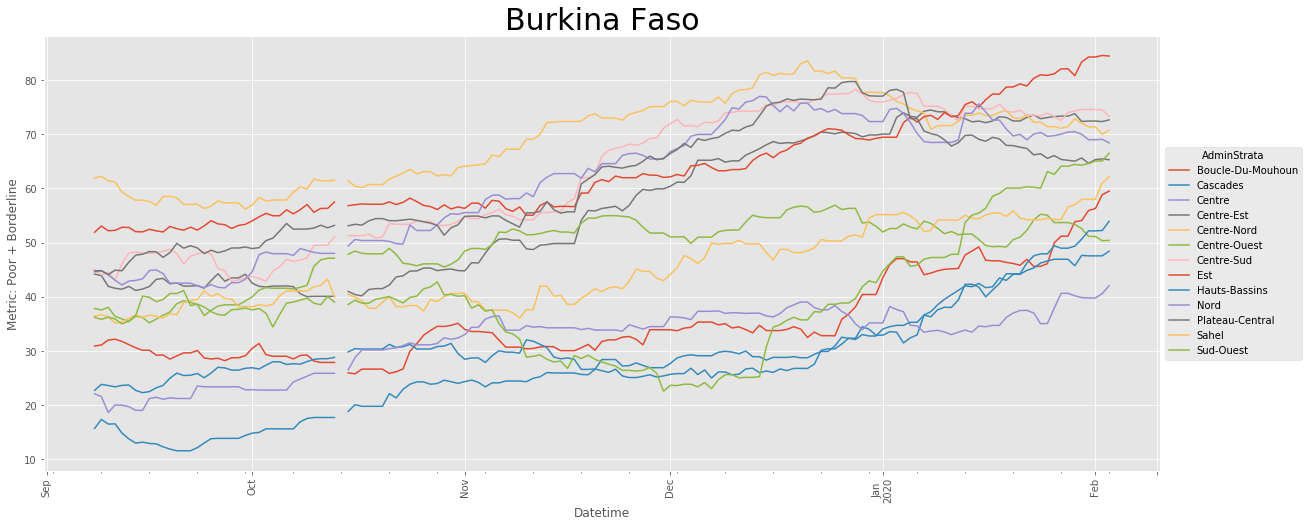

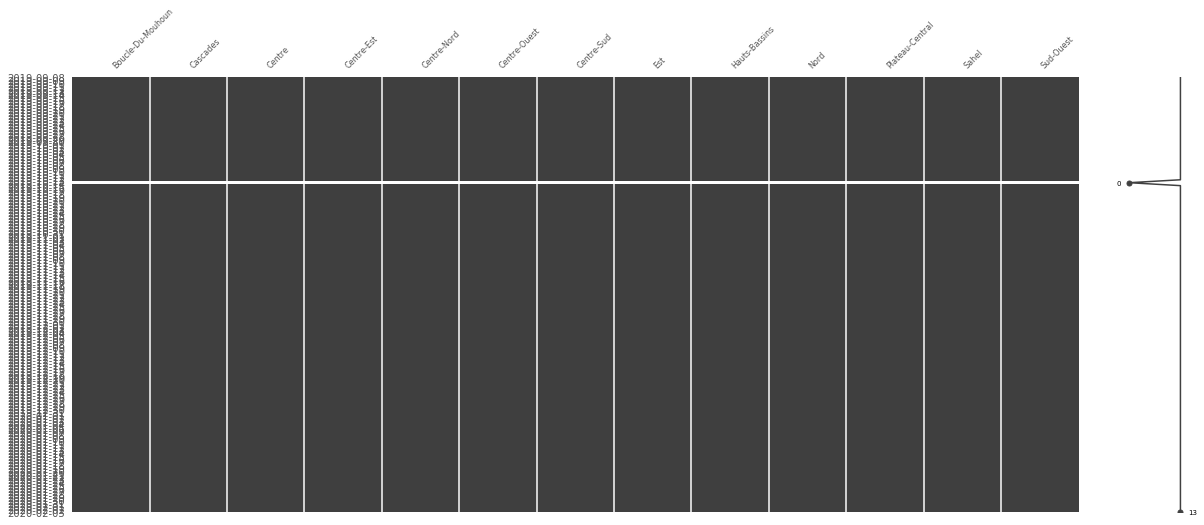

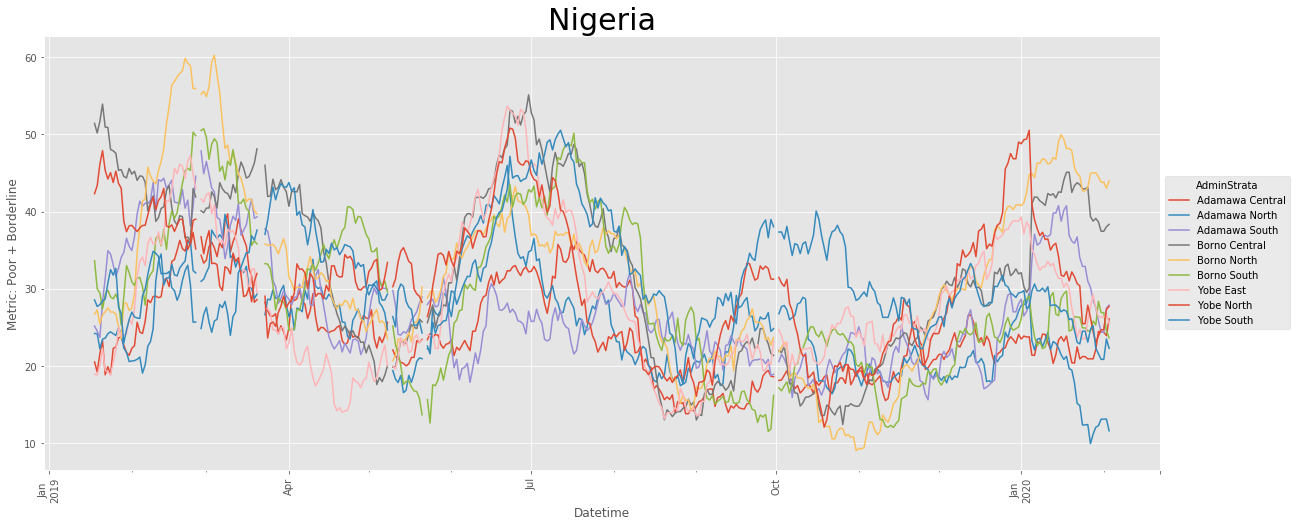

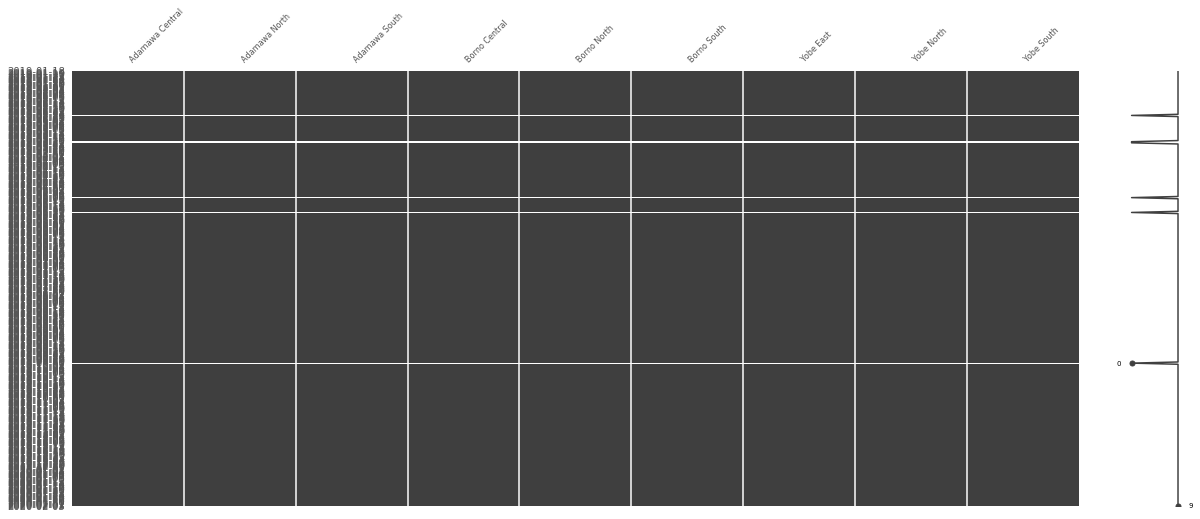

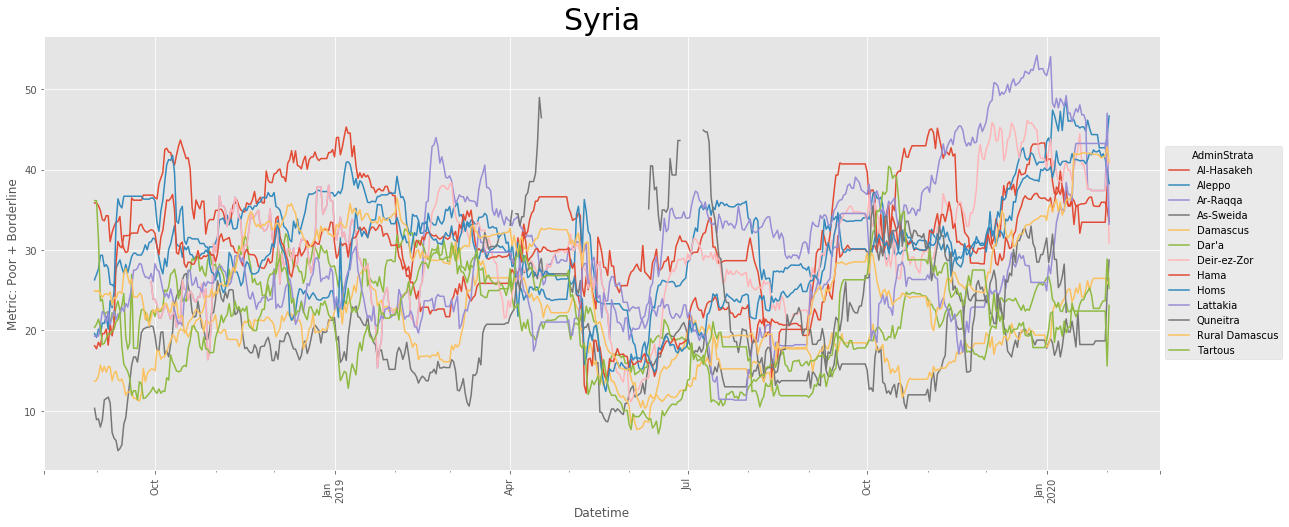

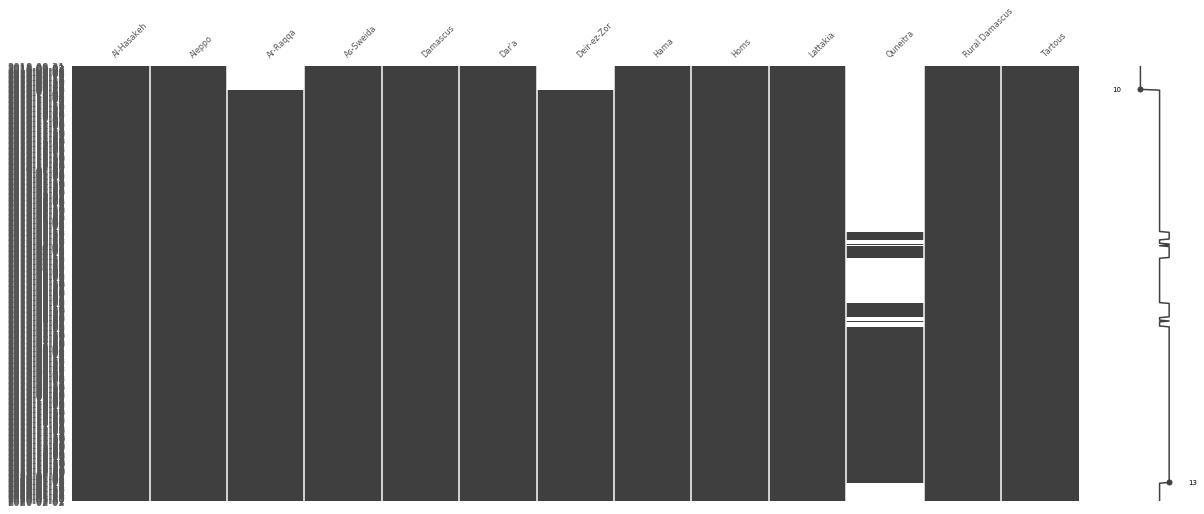

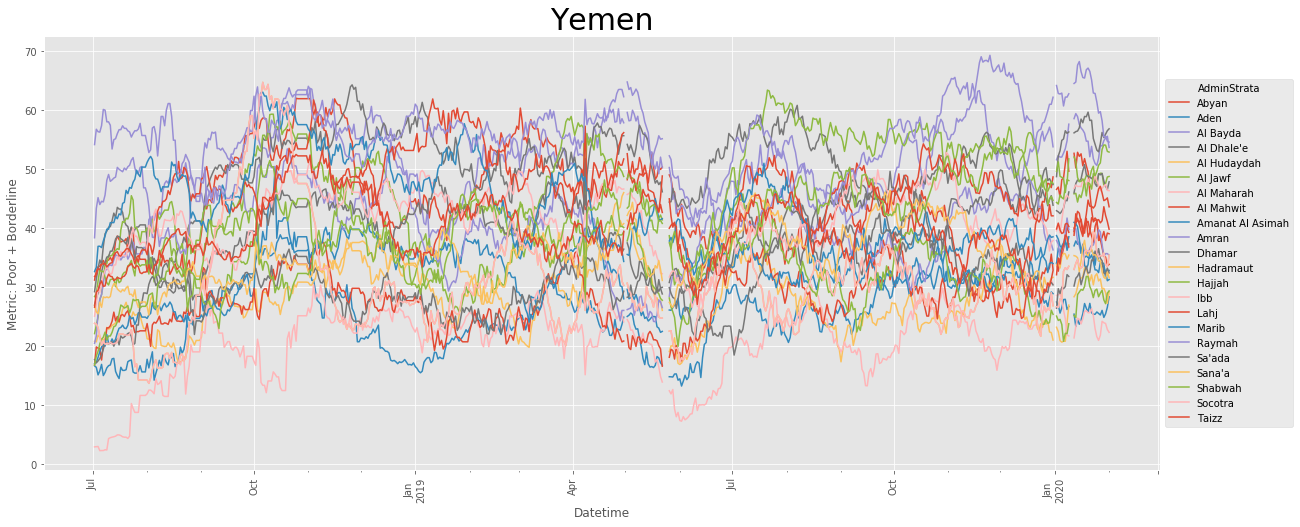

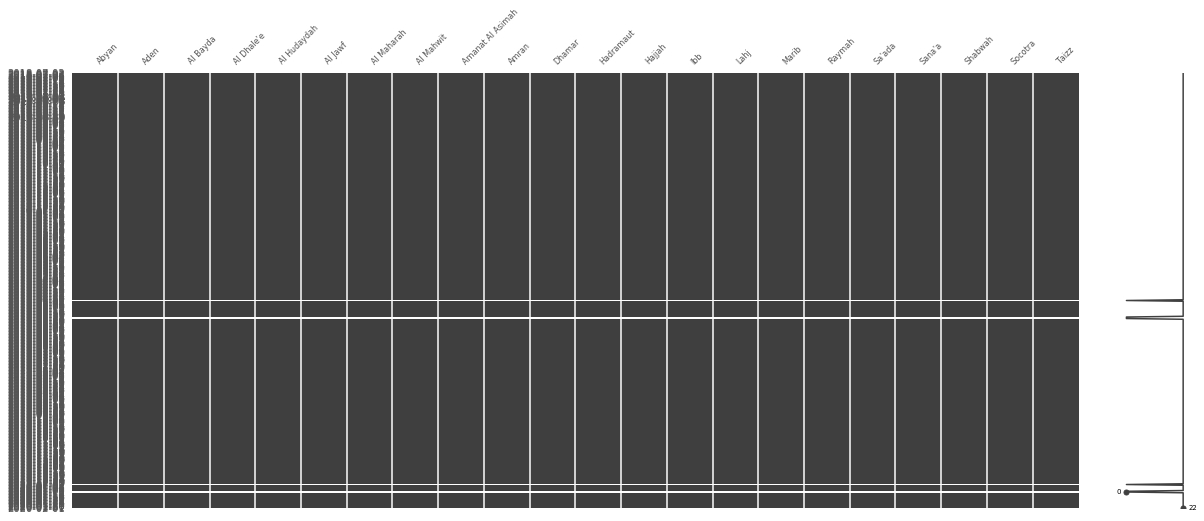

In [17]:
# Plot the time-series of the adminstrata.
def plot(group, freq, style, save = False, name = "wfp_fcs_"):
    country = group.columns.get_level_values(0).unique()[0]
    f = plt.figure(figsize = (20, 8))
    plt.title(country, color = "black", fontsize = 30)
    group.columns = group.columns.droplevel()
    group.columns = group.columns.droplevel(1)
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    group.plot(ax = f.gca(), style = style)
    plt.legend(title = "AdminStrata", loc = "center left", bbox_to_anchor = (1.0, 0.5))
    plt.ylabel("Metric: Poor + Borderline")
    plt.xticks(rotation = 90)
    plt.autoscale()
    plt.show()
    plt.close()
   
    # Visualization of the missing values of the current time-series.
    miss = msno.matrix(group, freq = freq, figsize = (20, 8), fontsize = 8)
    
    # Readding the column index to indicate the corresonding indicator.
    group.columns = pd.MultiIndex.from_product([group.columns, ["*FCS"]])
    
    if save:
        group.to_csv("./time-series/" + name + country + ".csv", index_label = False)
    
df_plot = df.groupby(axis = 1, level = 0).apply(lambda x: plot(x, df.index.freq, "-"))

## Adjusting the time-series

In [18]:
# I get the time-series for each country without nan values in the middle and with equal start and end between adminstrata of the same country.
def interpolation(group):   
    group.columns = group.columns.droplevel()
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    group = group.interpolate(method = "linear", limit = 7)
    # Delete time-series that still have some NaN values.
    group.dropna(inplace = True, axis = 1)
    return group

df_interpolate = df.groupby(axis = 1, level = 0).apply(interpolation)
df_interpolate.head()

Burkina Faso                                         \
           Boucle-Du-Mouhoun Cascades Centre Centre-Est Centre-Nord   
                        *FCS     *FCS   *FCS       *FCS        *FCS   
Datetime                                                              
2018-07-02               NaN      NaN    NaN        NaN         NaN   
2018-07-03               NaN      NaN    NaN        NaN         NaN   
2018-07-04               NaN      NaN    NaN        NaN         NaN   
2018-07-05               NaN      NaN    NaN        NaN         NaN   
2018-07-06               NaN      NaN    NaN        NaN         NaN   

                                                            ...      Yemen  \
           Centre-Ouest Centre-Sud  Est Hauts-Bassins Nord  ...     Hajjah   
                   *FCS       *FCS *FCS          *FCS *FCS  ...       *FCS   
Datetime                                                    ...              
2018-07-02          NaN        NaN  NaN           NaN  NaN  ...  28.361345   
2018-07-03          NaN        NaN  NaN           NaN  NaN  ...  28.805448   
2018-07-04          NaN        NaN  NaN           NaN  NaN  ...  30.993706   
2018-07-05          NaN        NaN  NaN           NaN  NaN  ...  32.905902   
2018-07-06          NaN        NaN  NaN           NaN  NaN  ...  32.598181   

                                                                              \
                  Ibb       Lahj      Marib     Raymah     Sa'ada     Sana'a   
                 *FCS       *FCS       *FCS       *FCS       *FCS       *FCS   
Datetime                                                                       
2018-07-02  25.036668  31.762436  32.596233  54.121774  17.676022  26.917713   
2018-07-03  27.102390  32.049499  33.333333  56.722689  17.134560  25.783476   
2018-07-04  29.844066  33.106267  36.883683  56.306306  17.454545  25.436047   
2018-07-05  29.025363  32.938828  36.897633  56.231003  17.846350  27.421759   
2018-07-06  30.692766  33.837934  36.669568  57.324841  18.463057  26.547231   

                                             
              Shabwah    Socotra      Taizz  
                 *FCS       *FCS       *FCS  
Datetime                                     
2018-07-02  16.752289  23.822825  26.563365  
2018-07-03  18.257453  23.699881  29.124005  
2018-07-04  19.083081  23.103187  29.427973  
2018-07-05  20.349533  21.596419  30.456026  
2018-07-06  21.107524  20.129084  31.012517  

[5 rows x 54 columns]

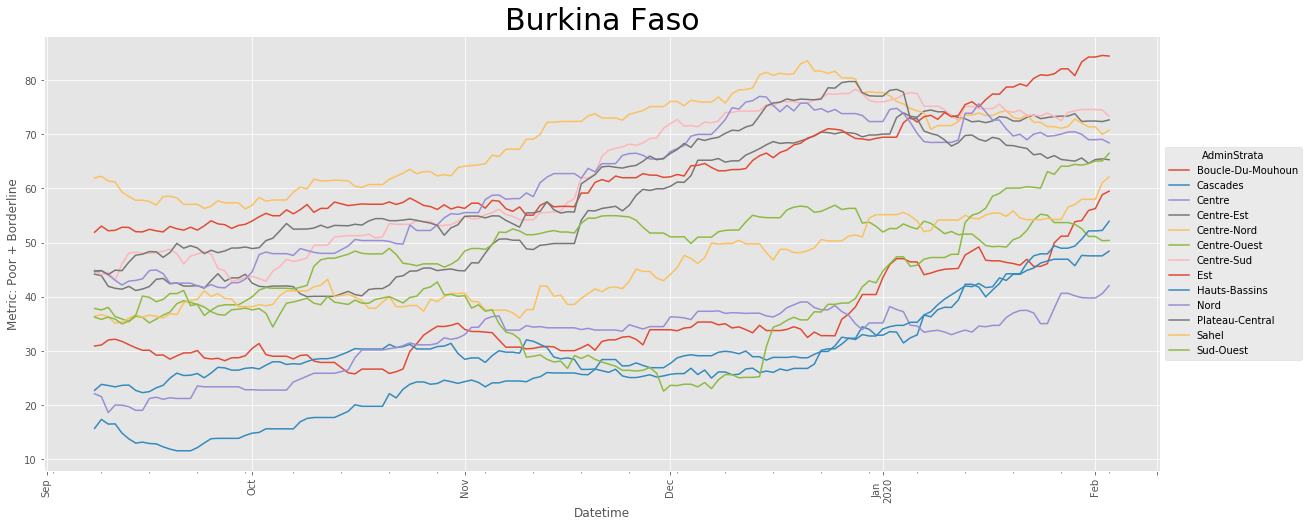

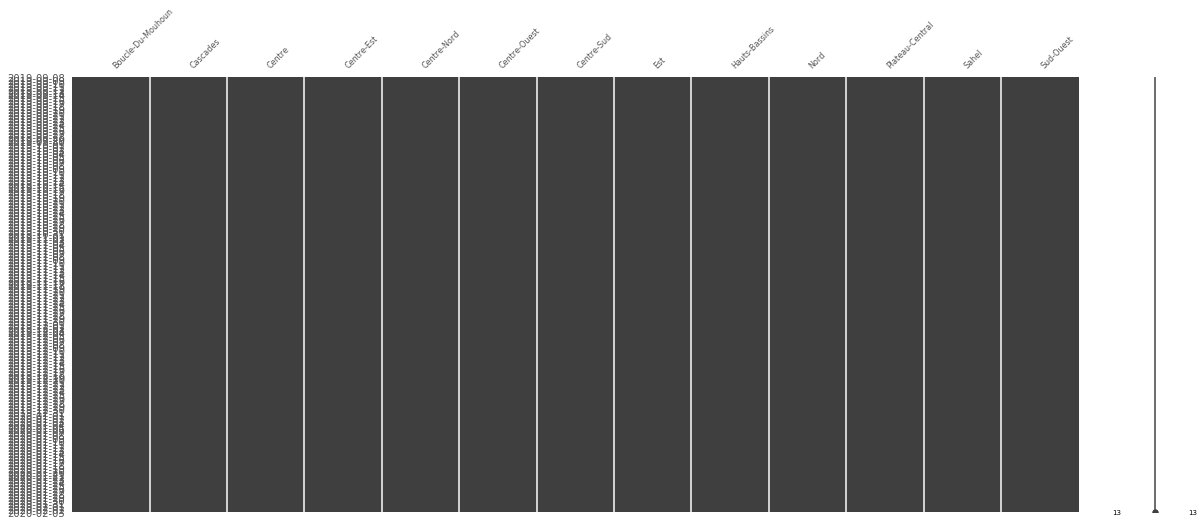

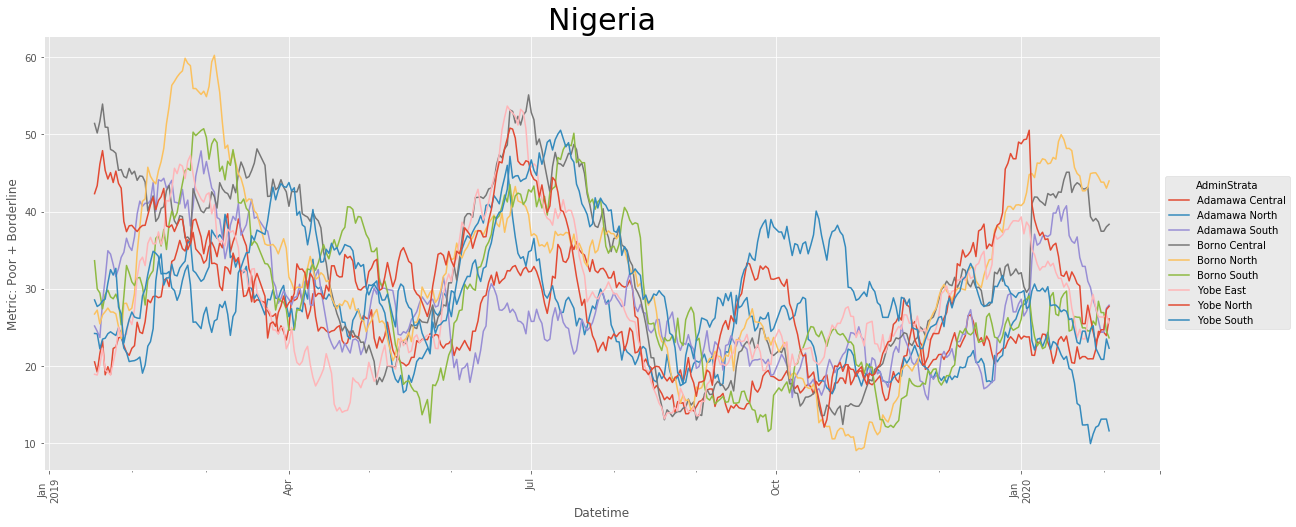

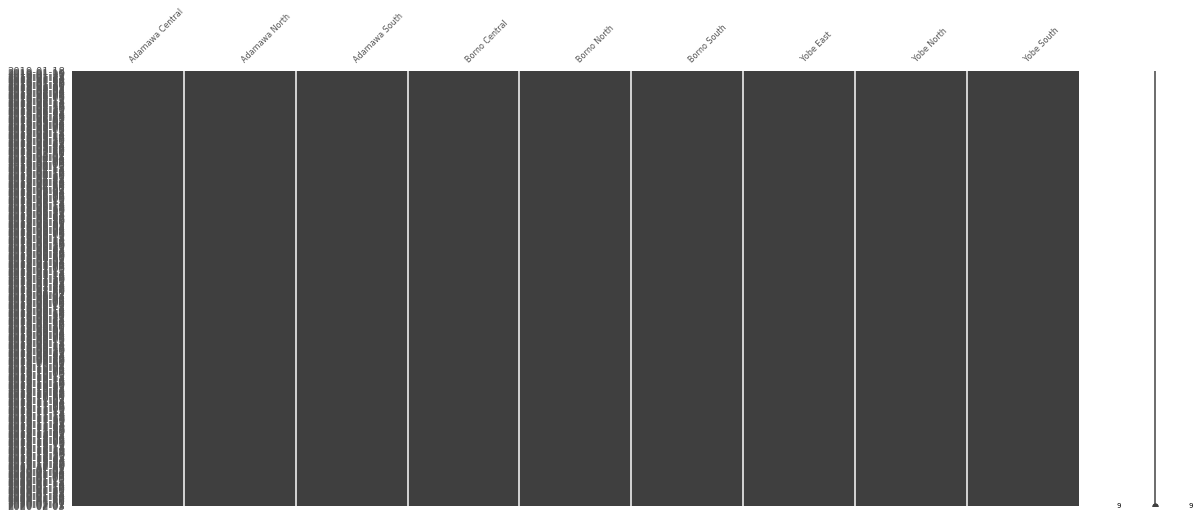

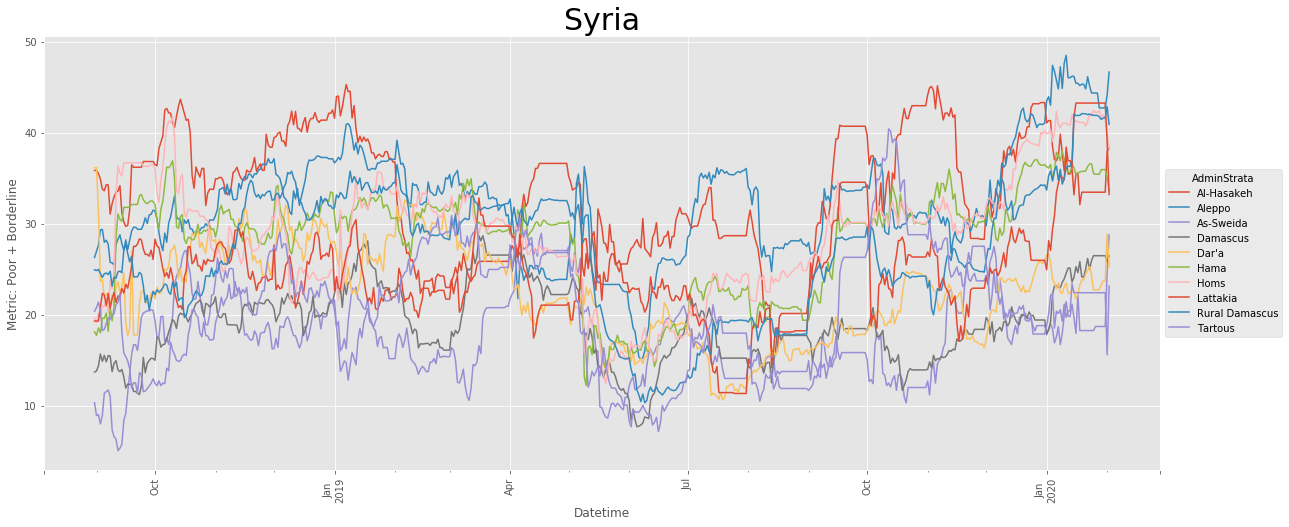

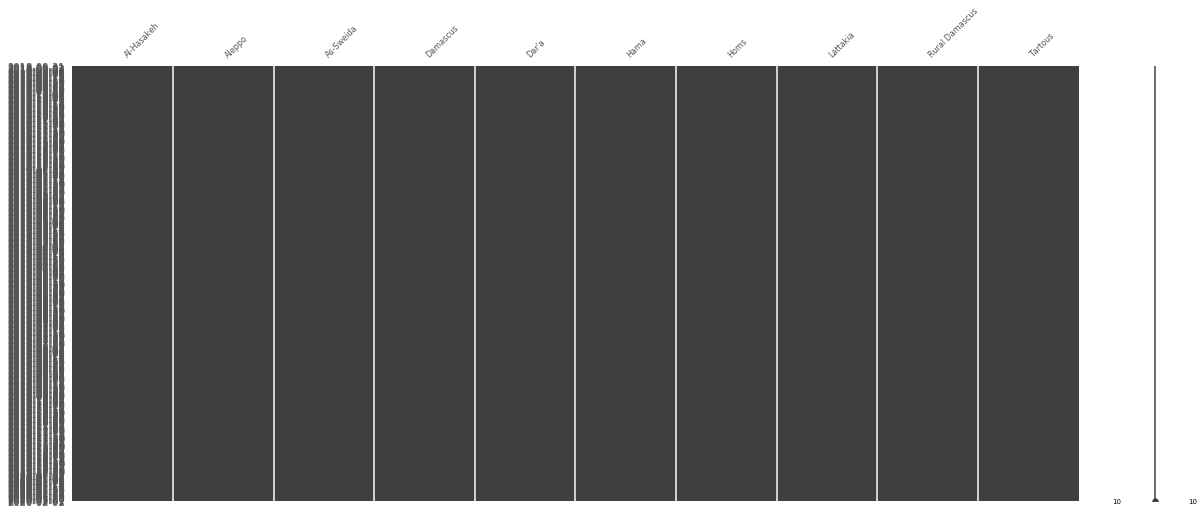

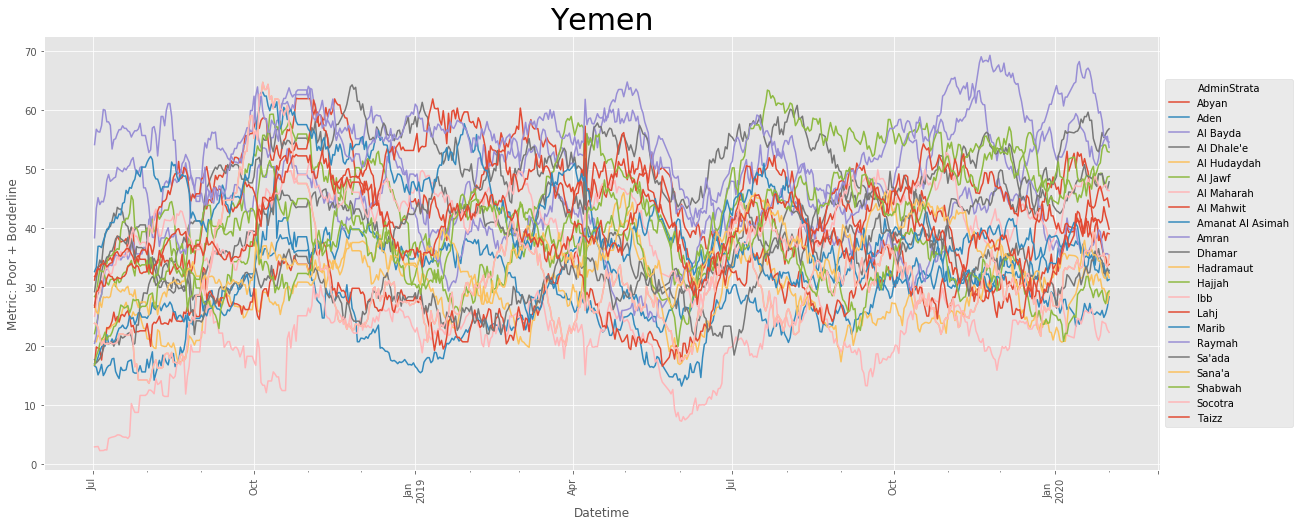

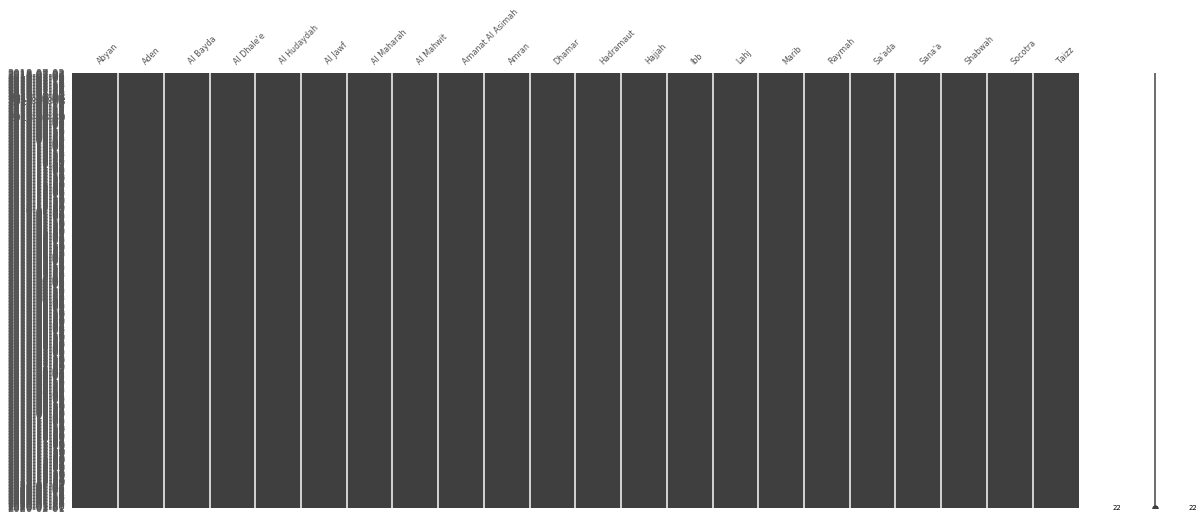

In [19]:
df_plot = df_interpolate.groupby(axis = 1, level = 0).apply(lambda x: plot(x, df_interpolate.index.freq, "-", True))

## Fit of the time-series (smooth data)

In [32]:
def fit(group):   
    group.columns = group.columns.droplevel()
    # Delete time-series that still have some NaN values.
    group.dropna(inplace = True, axis = 0)

    return group.rolling(window = 3).mean()

df_fit = df_interpolate.groupby(axis = 1, level = 0).apply(fit)
df_fit.dropna(axis = 0, how = "all", inplace = True)
df_fit.head()

Burkina Faso                                         \
           Boucle-Du-Mouhoun Cascades Centre Centre-Est Centre-Nord   
                        *FCS     *FCS   *FCS       *FCS        *FCS   
Datetime                                                              
2018-07-04               NaN      NaN    NaN        NaN         NaN   
2018-07-05               NaN      NaN    NaN        NaN         NaN   
2018-07-06               NaN      NaN    NaN        NaN         NaN   
2018-07-07               NaN      NaN    NaN        NaN         NaN   
2018-07-08               NaN      NaN    NaN        NaN         NaN   

                                                            ...      Yemen  \
           Centre-Ouest Centre-Sud  Est Hauts-Bassins Nord  ...     Hajjah   
                   *FCS       *FCS *FCS          *FCS *FCS  ...       *FCS   
Datetime                                                    ...              
2018-07-04          NaN        NaN  NaN           NaN  NaN  ...  29.386833   
2018-07-05          NaN        NaN  NaN           NaN  NaN  ...  30.901685   
2018-07-06          NaN        NaN  NaN           NaN  NaN  ...  32.165930   
2018-07-07          NaN        NaN  NaN           NaN  NaN  ...  32.716602   
2018-07-08          NaN        NaN  NaN           NaN  NaN  ...  32.286169   

                                                                              \
                  Ibb       Lahj      Marib     Raymah     Sa'ada     Sana'a   
                 *FCS       *FCS       *FCS       *FCS       *FCS       *FCS   
Datetime                                                                       
2018-07-04  27.327708  32.306068  34.271083  55.716923  17.421709  26.045745   
2018-07-05  28.657273  32.698198  35.704883  56.419999  17.478485  26.213760   
2018-07-06  29.854065  33.294343  36.816961  56.620717  17.921317  26.468345   
2018-07-07  30.566249  33.565822  37.119752  57.878429  18.587186  27.424604   
2018-07-08  31.804148  33.909742  37.699966  59.121867  19.469927  27.675142   

                                             
              Shabwah    Socotra      Taizz  
                 *FCS       *FCS       *FCS  
Datetime                                     
2018-07-04  18.030941  23.541964  28.371781  
2018-07-05  19.230023  22.799829  29.669335  
2018-07-06  20.180046  21.609563  30.298839  
2018-07-07  20.977798  20.831270  30.519852  
2018-07-08  21.639323  20.392917  30.425149  

[5 rows x 54 columns]

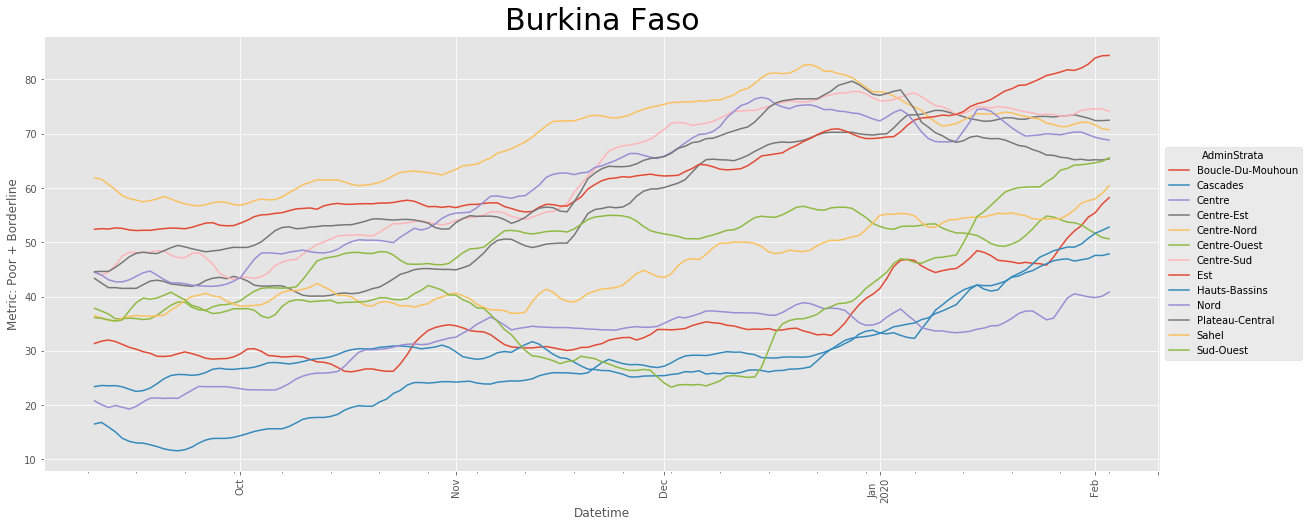

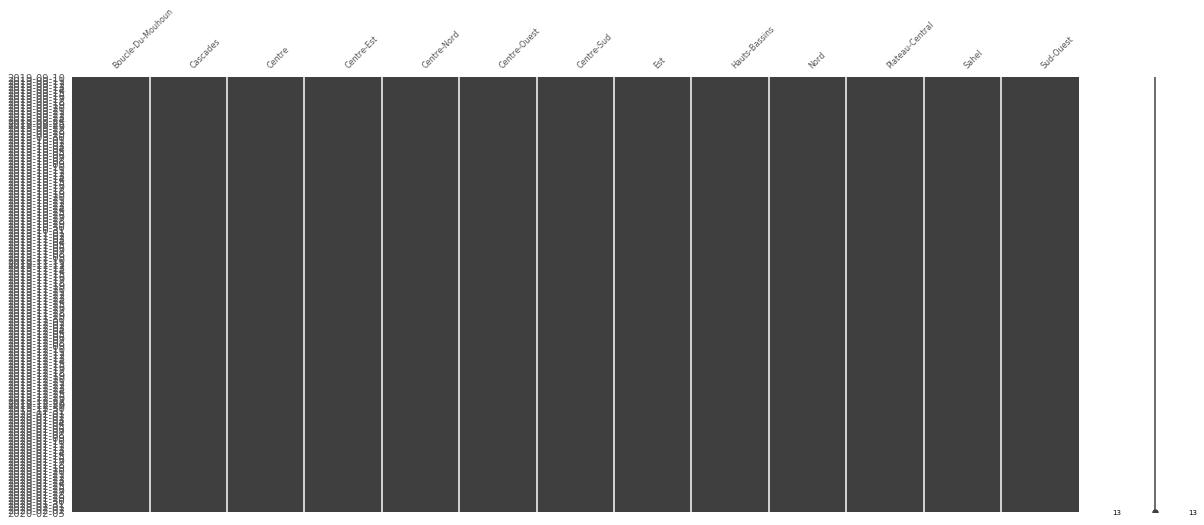

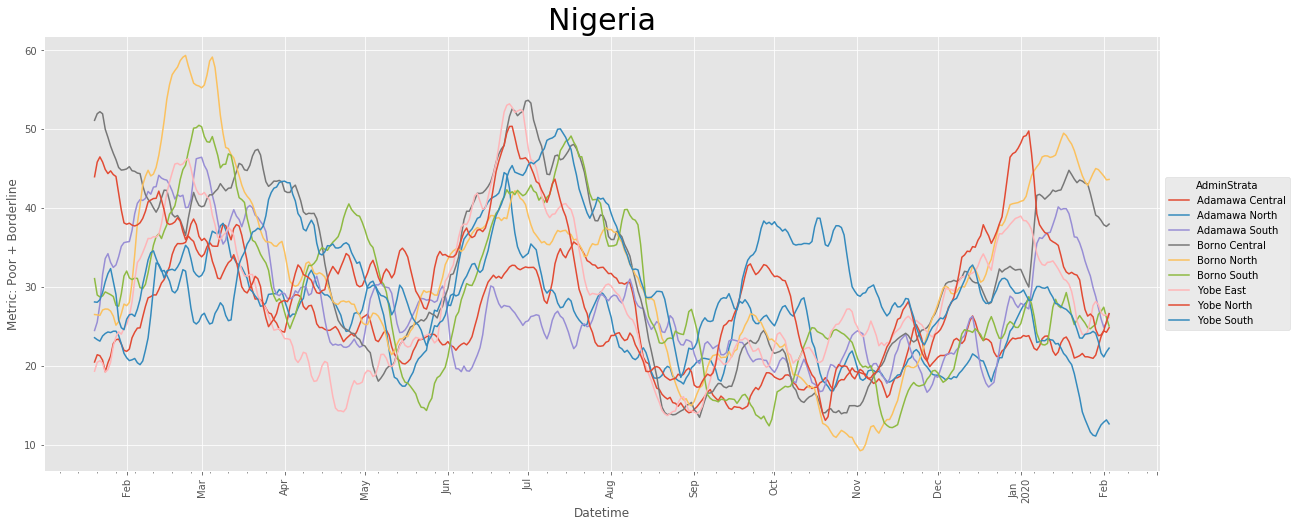

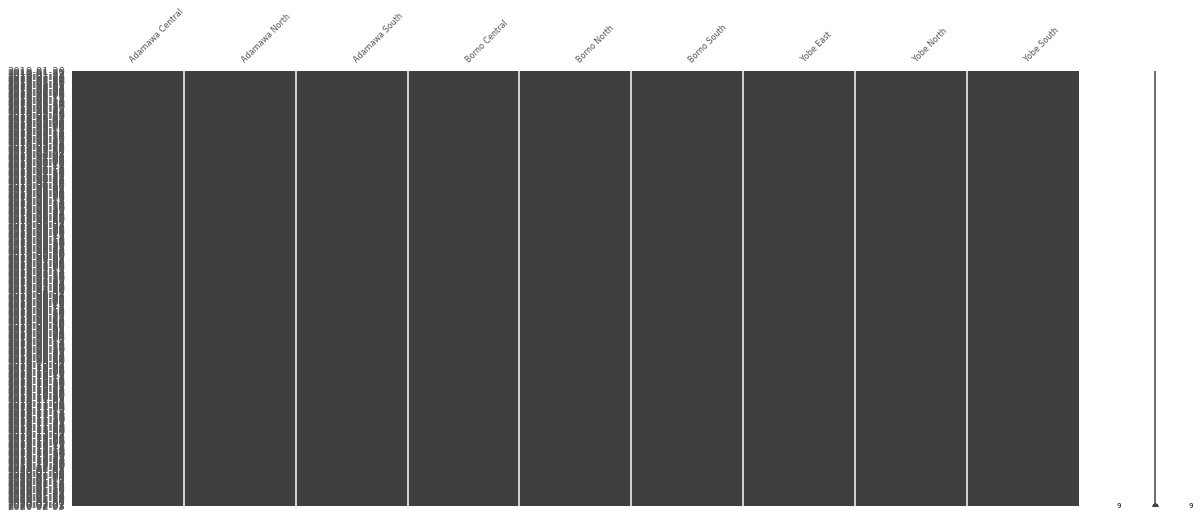

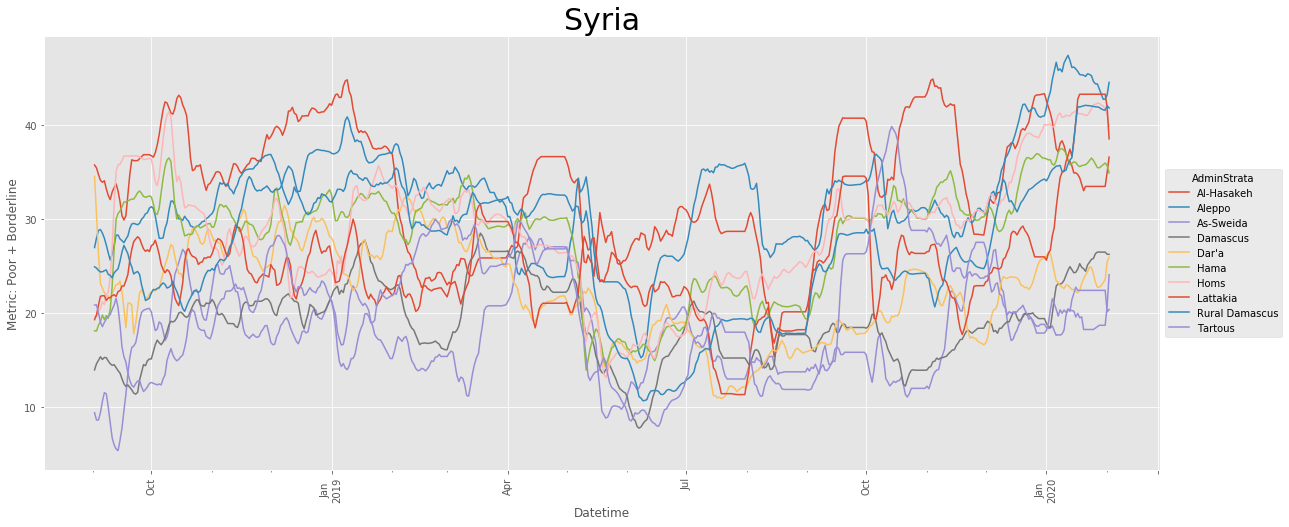

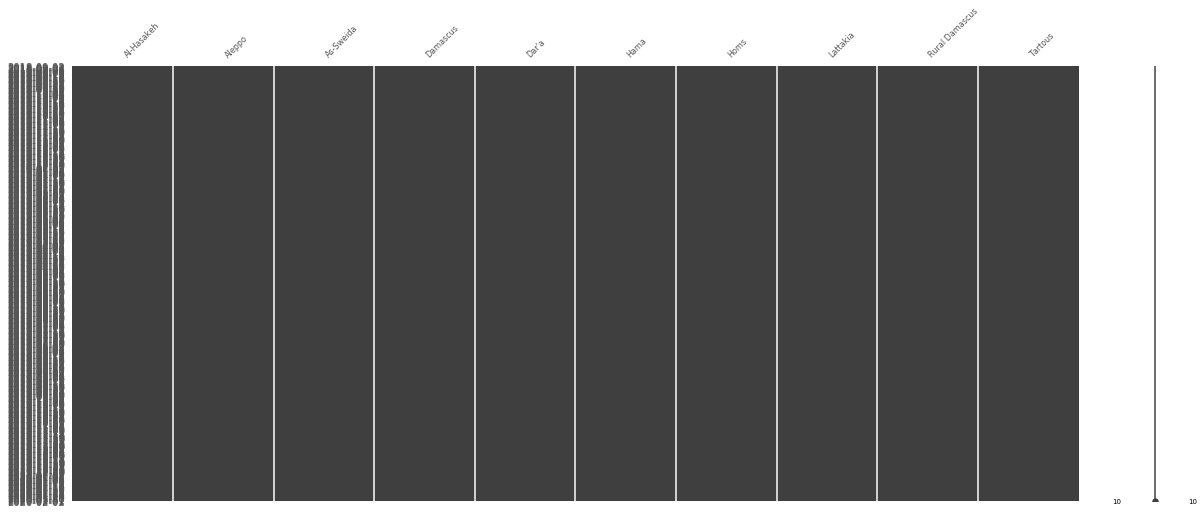

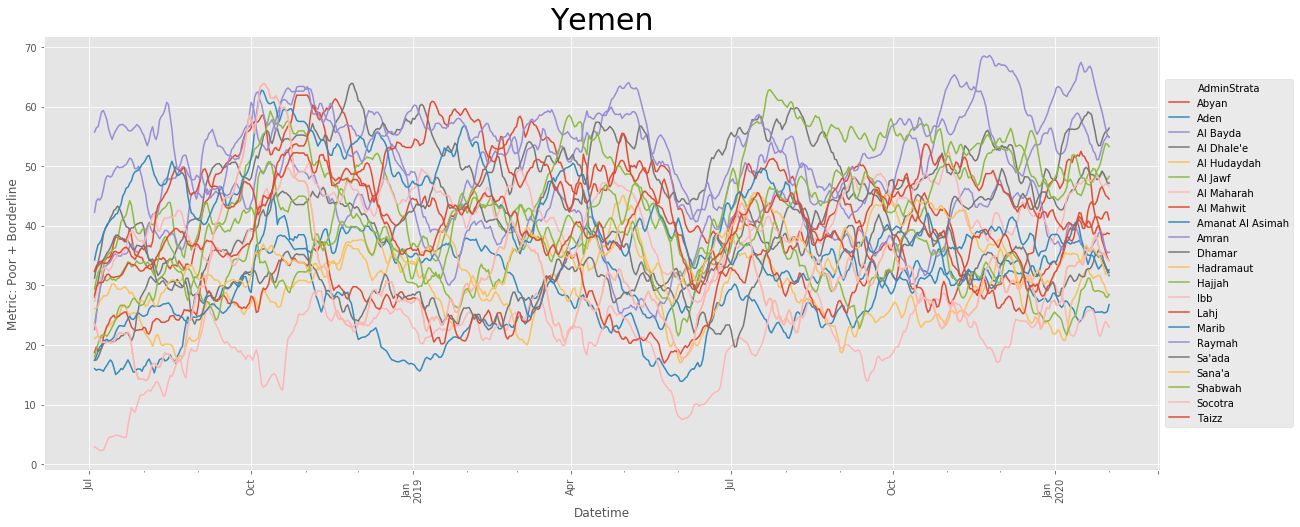

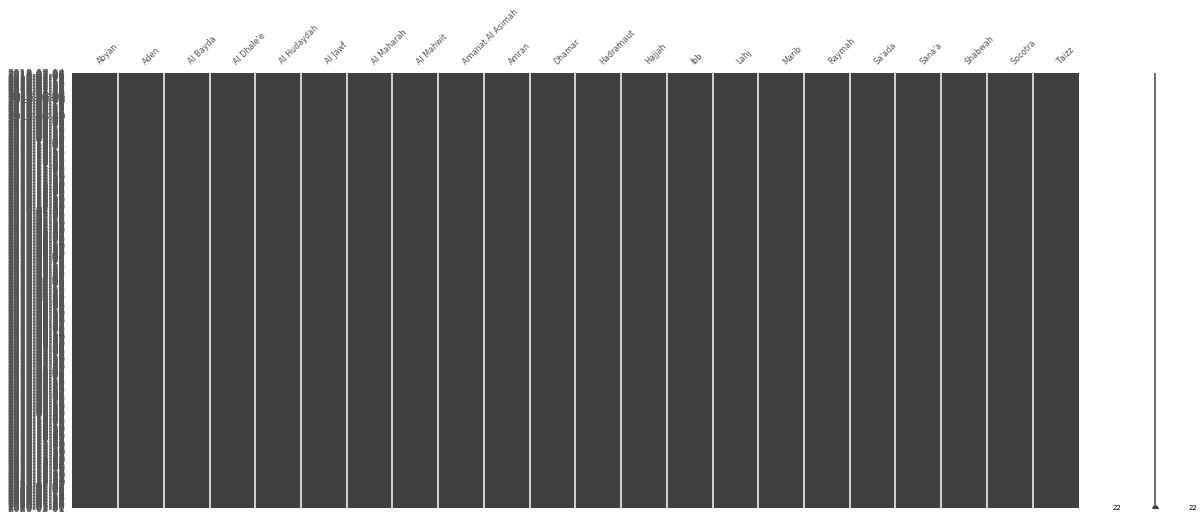

In [33]:
df_plot = df_fit.groupby(axis = 1, level = 0).apply(lambda x: plot(x, df_fit.index.freq, "-", True, "wfp_fcs_smooth_"))

### Example

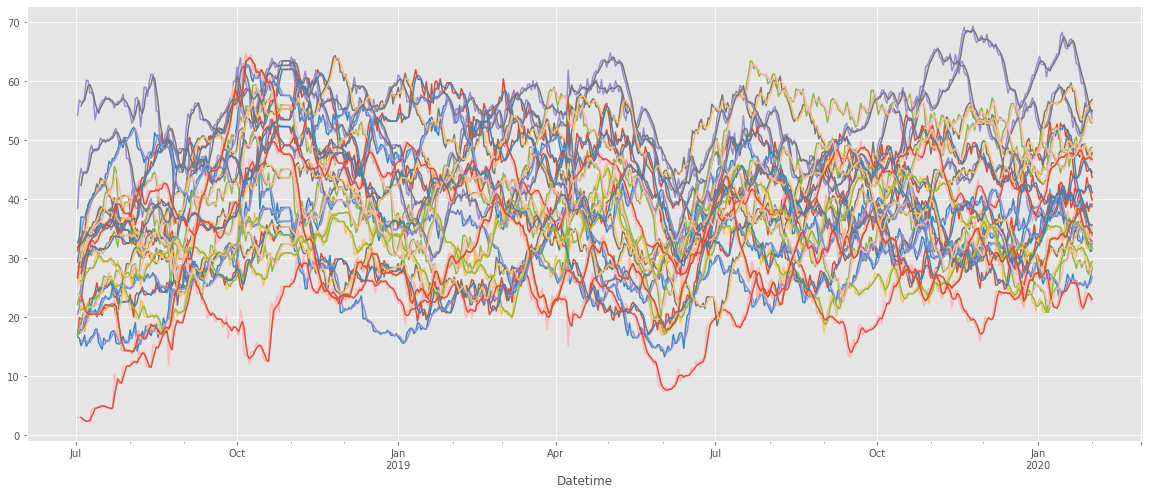

In [34]:
f = plt.figure(figsize = (20, 8))
df_interpolate.Yemen.plot(ax = f.gca(), legend = False)
df_fit.Yemen.plot(ax = f.gca(), legend = False)
plt.autoscale()